In [108]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [109]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,D
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,D
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C


In [208]:
mainData.describe()

,G3,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,grades
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.415190,0.883544,0.473418,0.242315,0.777215,0.288608,0.103797,0.687342,0.63038,0.415823,...,0.736076,0.558861,0.527215,0.120253,0.322785,0.638608,0.076118,0.494304,0.563891,0.508861
std,4.581443,0.321177,0.499926,0.182292,0.416643,0.453690,0.305384,0.273684,0.27205,0.288918,...,0.224165,0.249716,0.278320,0.222685,0.321974,0.347576,0.106708,0.207450,0.197974,0.258579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.142857,1.000000,0.000000,0.000000,0.500000,0.50000,0.250000,...,0.750000,0.500000,0.250000,0.000000,0.000000,0.500000,0.000000,0.312500,0.473684,0.250000
50%,11.000000,1.000000,0.000000,0.285714,1.000000,0.000000,0.000000,0.750000,0.50000,0.250000,...,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.053333,0.500000,0.578947,0.500000
75%,14.000000,1.000000,1.000000,0.428571,1.000000,1.000000,0.000000,1.000000,0.75000,0.500000,...,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,0.106667,0.625000,0.684211,0.750000
max,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
finalgrade = pd.DataFrame(mainData['G3'])
finalgrade.shape
#finalgrade.head()

(395, 1)

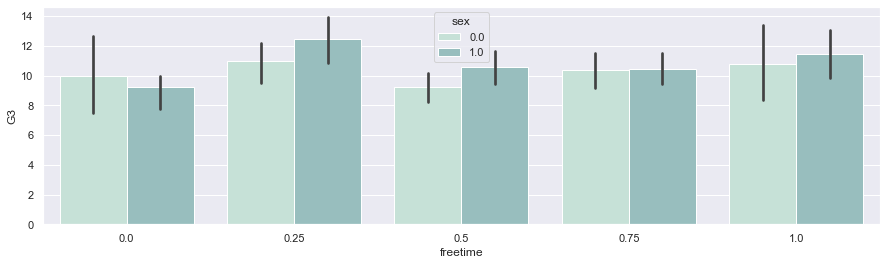

In [206]:
#freetime vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='freetime', y='G3', hue='sex', data=mainData,)
plt.show()

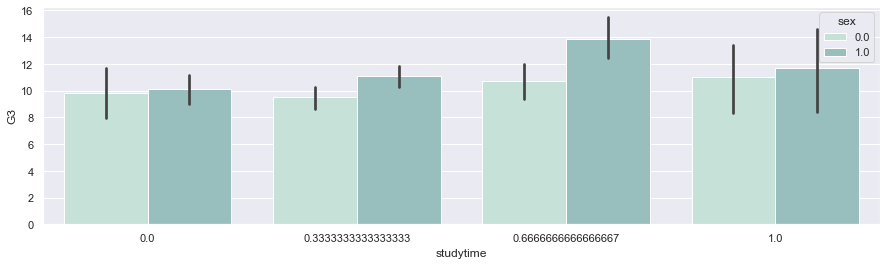

In [205]:
#studytime vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='studytime', y='G3', hue='sex', data=mainData)
plt.show()

In [201]:
mEdu = pd.DataFrame(mainData['Medu'])
fEdu = pd.DataFrame(mainData['Fedu'])
mJob = pd.DataFrame(mainData['Mjob'])
fJob = pd.DataFrame(mainData['Fjob'])

In [203]:
parentsFactor = pd.concat([mEdu, fEdu, mJob, fJob, G3], axis = 1).reindex(mEdu.index)

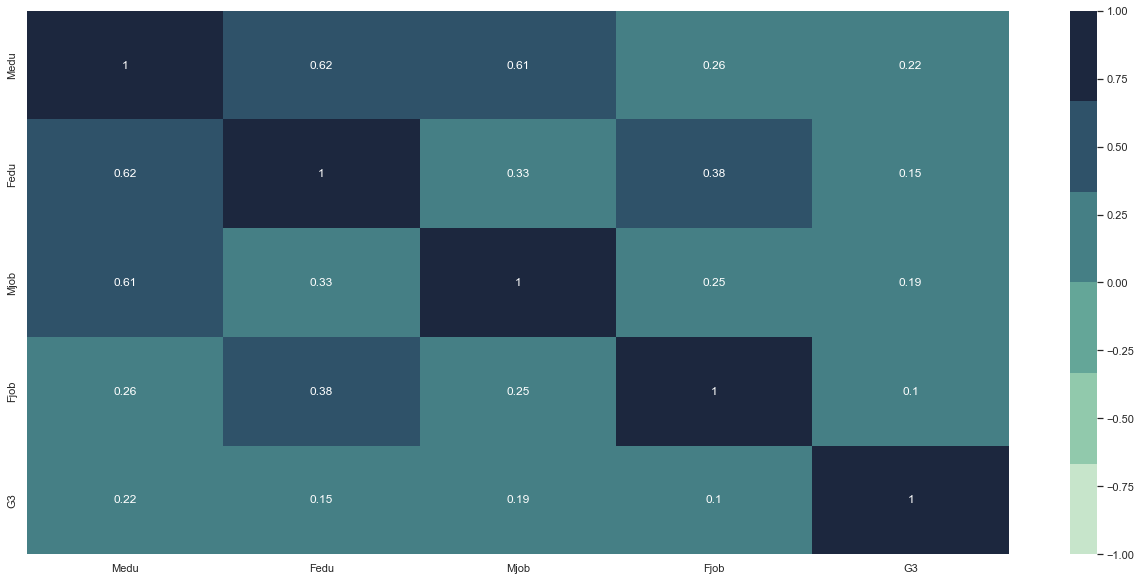

In [204]:
#comparing parents' education and job to G3
fig = plt.figure(figsize=[22,10])
    
sb.heatmap(parentsFactor.corr(), vmin = -1, vmax = 1, annot=True, cmap=sb.cubehelix_palette(rot=-.4))

plt.show()

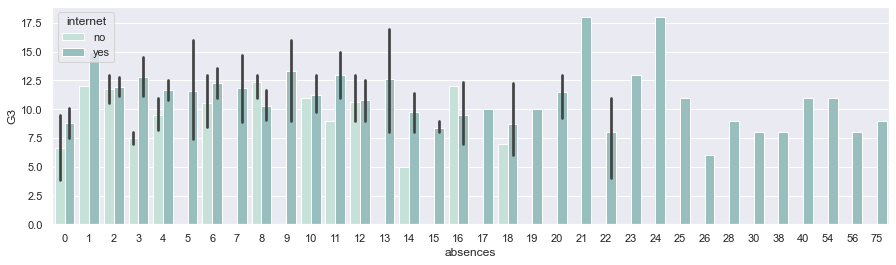

In [116]:
#failures vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='absences', y='G3', hue='internet', data=mainData,)
plt.show()

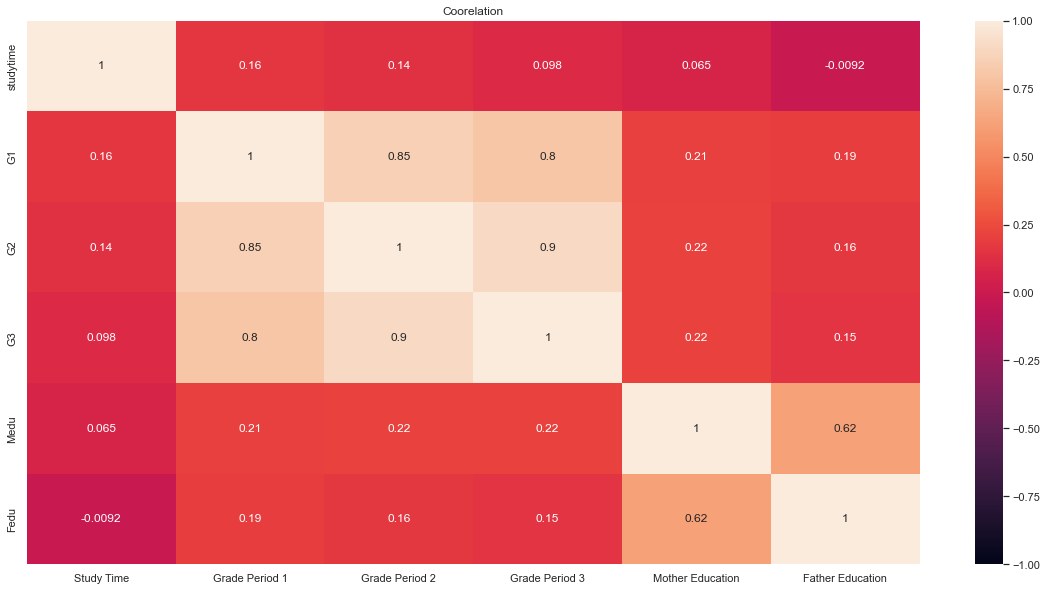

In [117]:
tmp = data[['studytime', 'G1', 'G2', 'G3', 'Medu', 'Fedu']].corr()
fig, ax = plt.subplots(figsize=(20, 10))
# fig, ax = plt.subplots()
sb.heatmap(data=tmp,vmin = -1, vmax = 1, annot=True)
ax.set_title("Coorelation")
ax.set_xticklabels(("Study Time", "Grade Period 1", "Grade Period 2", "Grade Period 3", "Mother Education", "Father Education"))
ax.set_xticklabels(("Study Time", "Grade Period 1", "Grade Period 2", "Grade Period 3", "Mother Education", "Father Education"))
plt.show()

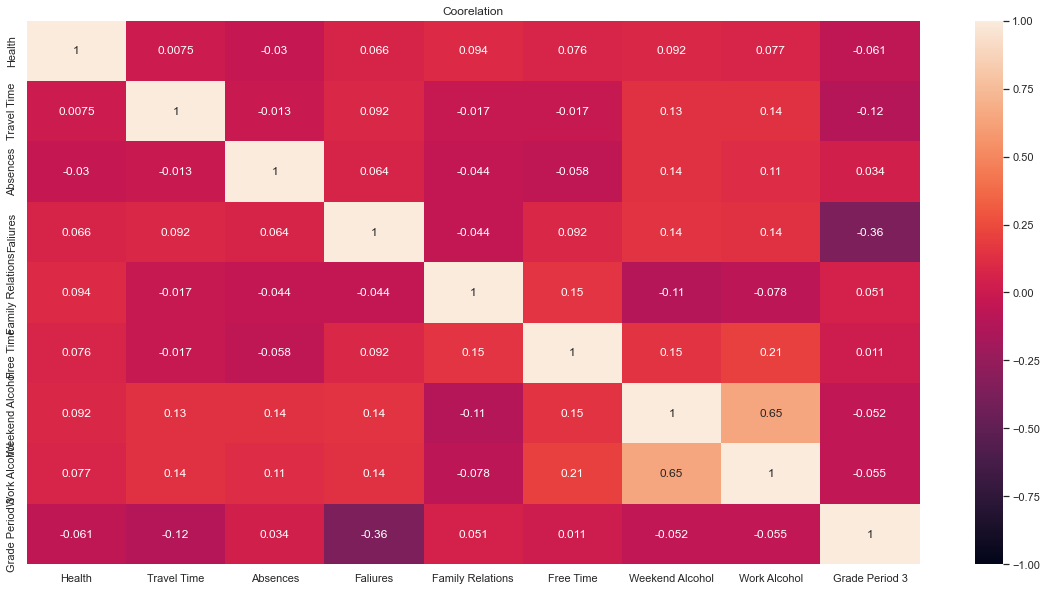

In [118]:
tmp = data[['health', 'traveltime', 'absences', 'failures', 'famrel', 'freetime','Walc', 'Dalc','G3']].corr()
fig, ax = plt.subplots(figsize=(20, 10))
# fig, ax = plt.subplots()
sb.heatmap(data=tmp,vmin = -1, vmax = 1, annot=True)
ax.set_title("Coorelation")
ax.set_xticklabels(("Health", "Travel Time", "Absences", "Faliures", "Family Relations", "Free Time", "Weekend Alcohol", "Work Alcohol","Grade Period 3"))
ax.set_yticklabels(("Health", "Travel Time", "Absences", "Faliures", "Family Relations", "Free Time", "Weekend Alcohol", "Work Alcohol","Grade Period 3"))
plt.show()

In [119]:
trial = pd.DataFrame(mainData[["famrel", "freetime", "goout", "Dalc"]])

In [120]:
trial.head()

,famrel,freetime,goout,Dalc
0,4,3,4,1
1,5,3,3,1
2,4,3,2,2
3,3,2,2,1
4,4,3,2,1


In [121]:
sb.set_style='darkgrid'

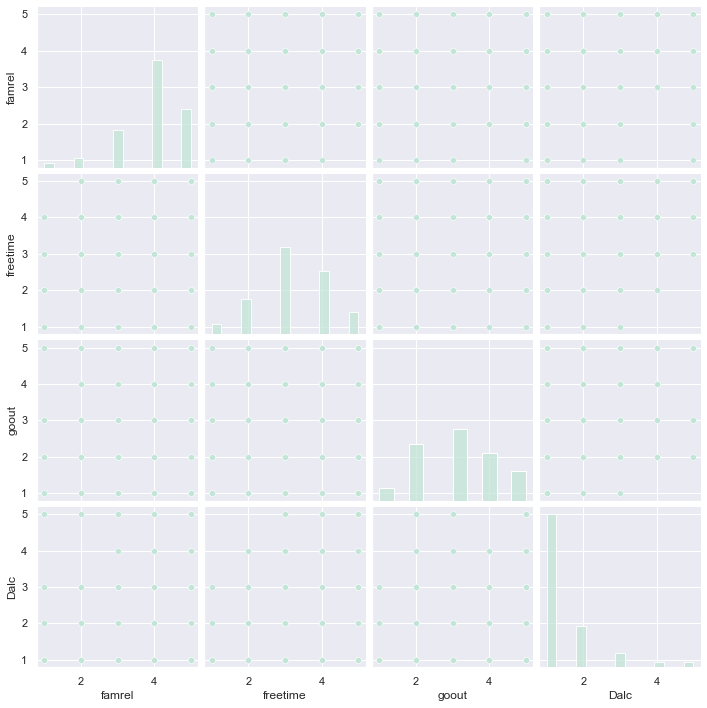

In [122]:
sb.pairplot(trial)

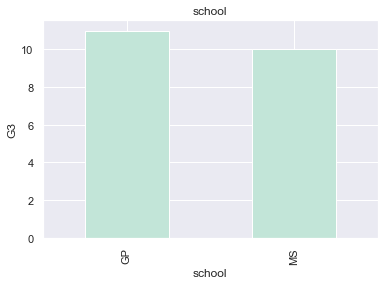

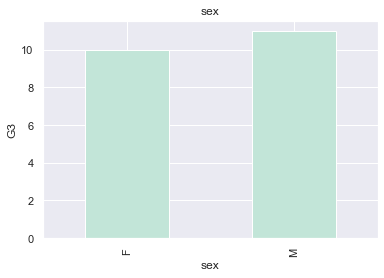

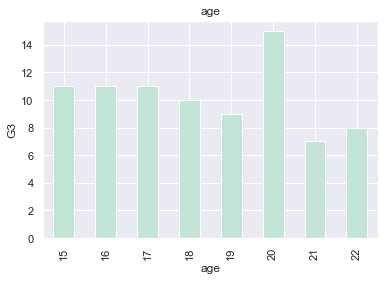

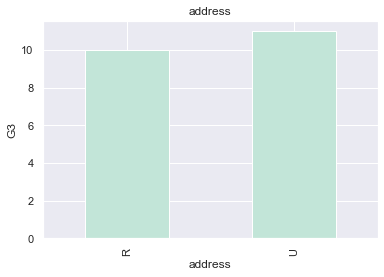

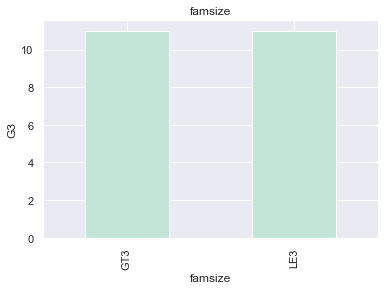

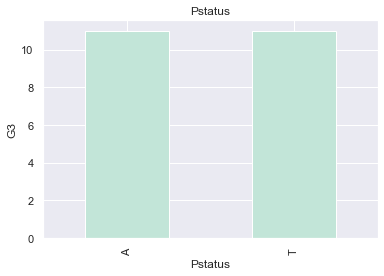

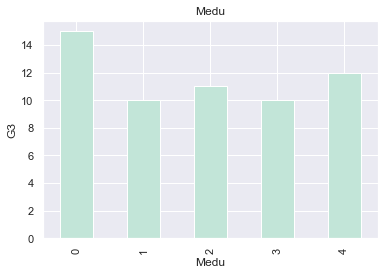

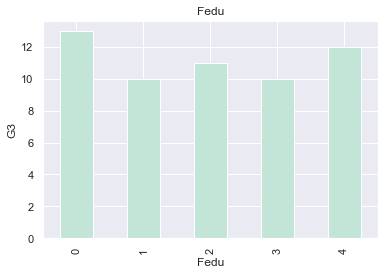

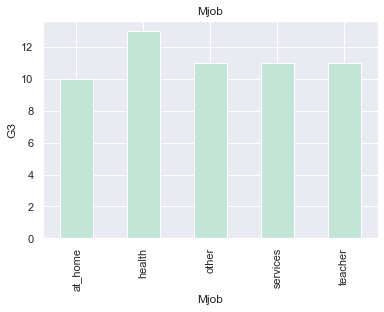

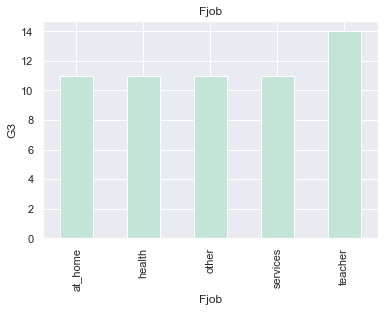

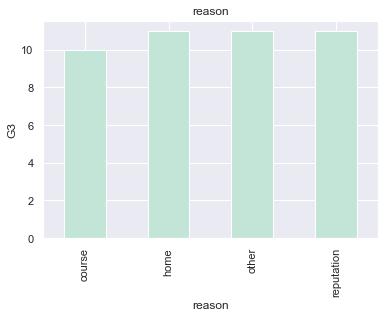

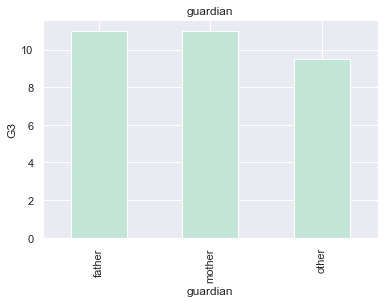

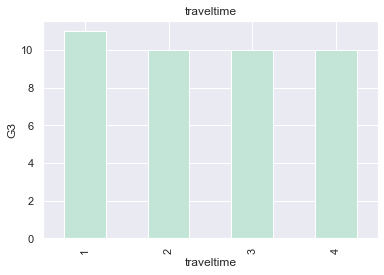

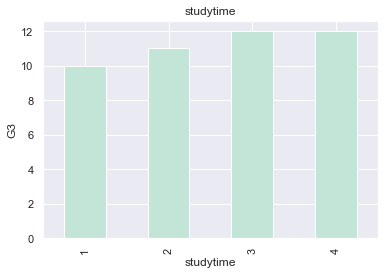

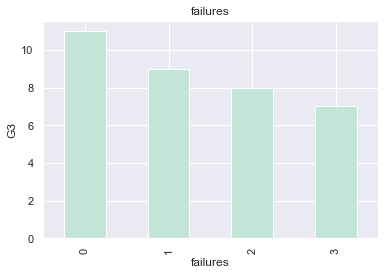

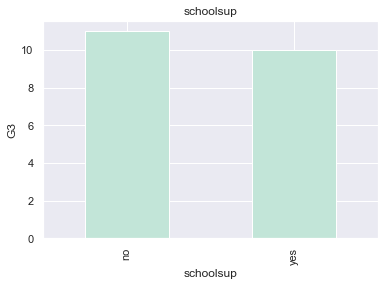

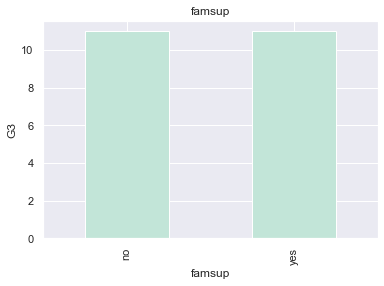

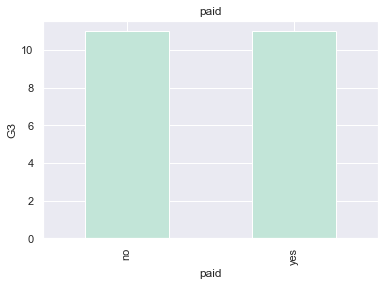

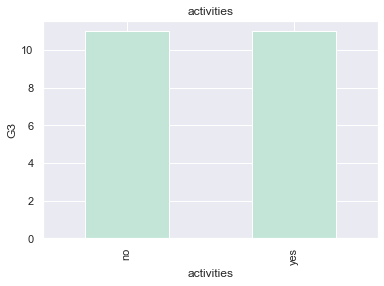

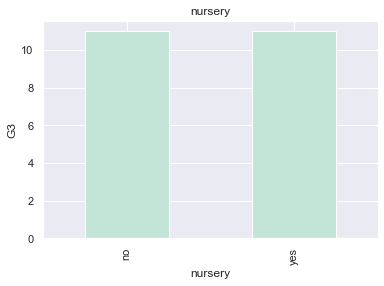

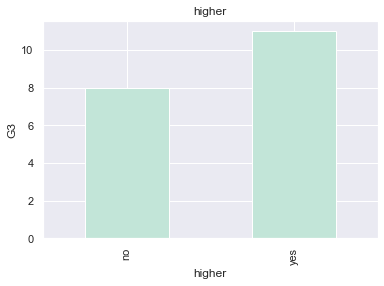

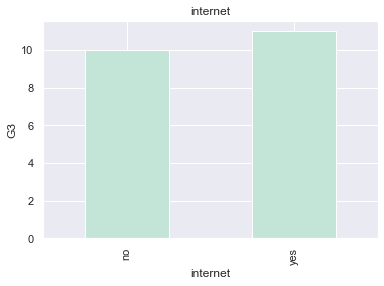

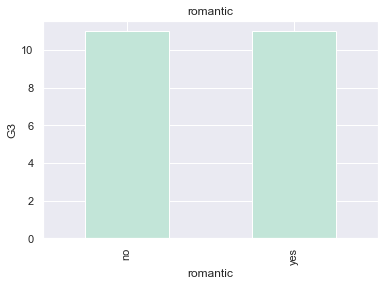

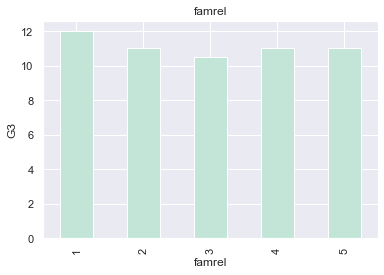

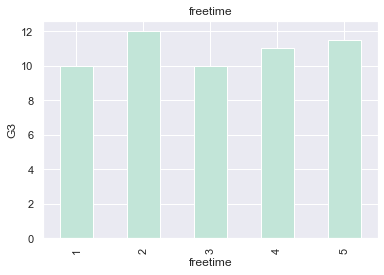

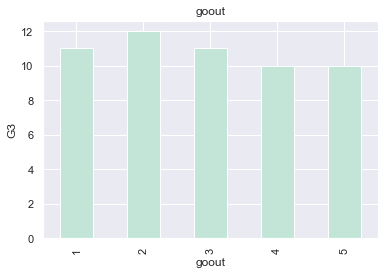

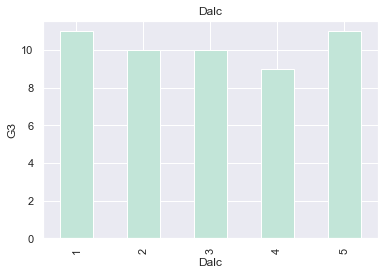

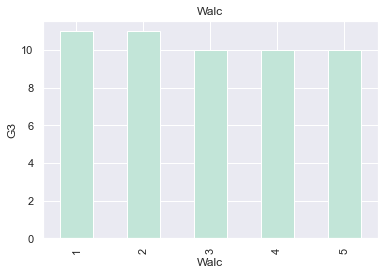

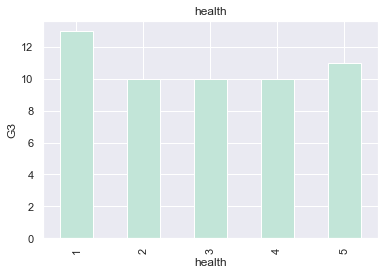

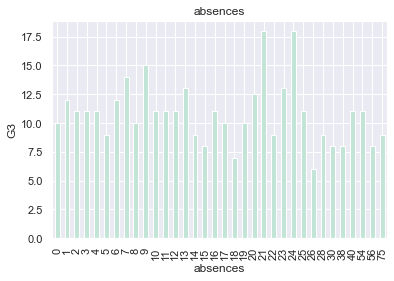

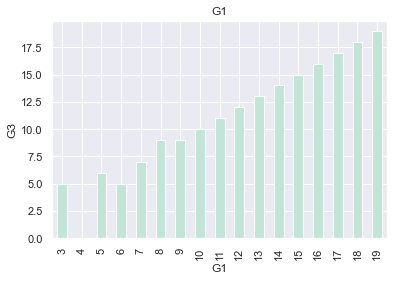

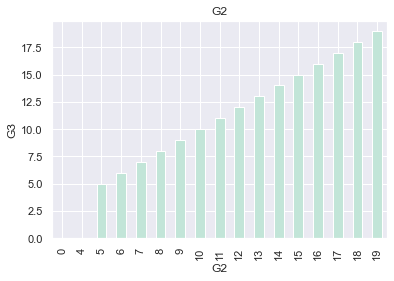

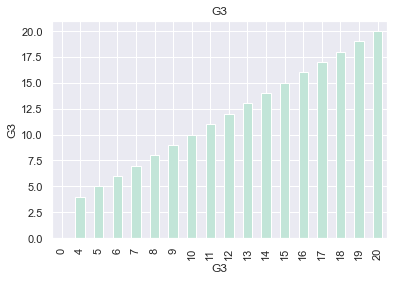

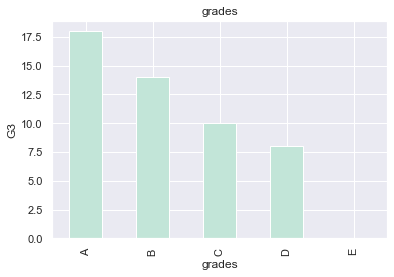

In [123]:
# finding relationship between discrete variables and G3

for features in mainData:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

16


<AxesSubplot:>

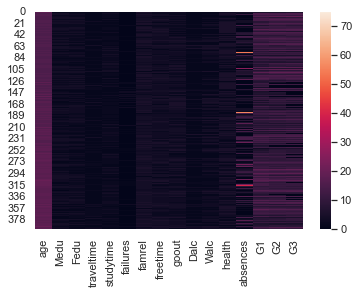

In [124]:
data = mainData.copy()
numerical_features = [
    features for features in data.columns if data[features].dtype != 'O']


print(len(numerical_features))
data[numerical_features].head()
sb.heatmap(data[numerical_features])

In [125]:
# discrete features
discrete_features = [features for features in numerical_features if len(
    data[features].unique()) <= 5]


print(len(discrete_features))
print(discrete_features)
print(data[discrete_features].head())

11
['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
   Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  Dalc  \
0     4     4           2          2         0       4         3      4     1   
1     1     1           1          2         0       5         3      3     1   
2     1     1           1          2         3       4         3      2     2   
3     4     2           1          3         0       3         2      2     1   
4     3     3           1          2         0       4         3      2     1   

   Walc  health  
0     1       3  
1     1       3  
2     3       3  
3     1       5  
4     2       5  


In [126]:
# continous features
continous_features = [
    features for features in numerical_features if features not in discrete_features]

print(len(continous_features))
print(continous_features)
data[continous_features].head()

5
['age', 'absences', 'G1', 'G2', 'G3']


,age,absences,G1,G2,G3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10


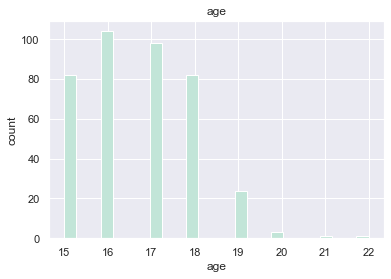

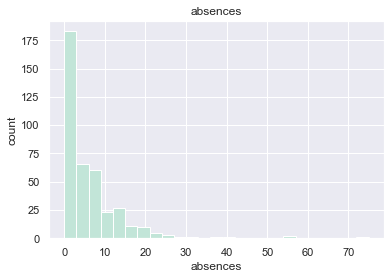

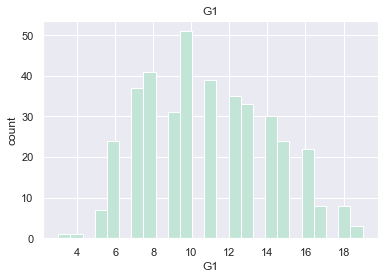

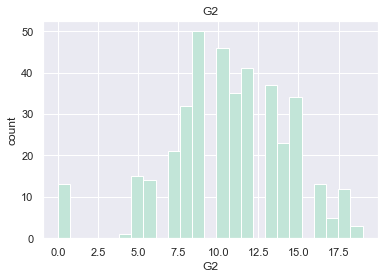

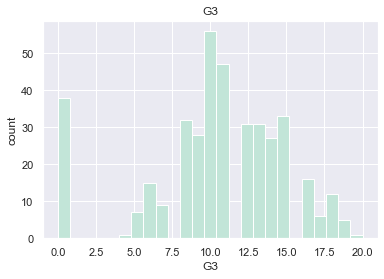

In [127]:
# plotting features to find relaion

for features in continous_features:
    data = mainData.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

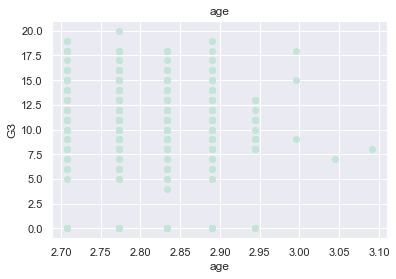

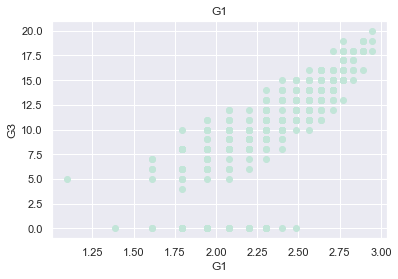

In [128]:
# using lograthmic transformations

for features in continous_features:
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        plt.scatter(data[features], data['G3'])
        plt.xlabel(features)
        plt.ylabel('G3')
        plt.title(features)
        plt.show()

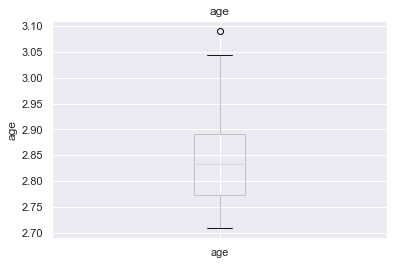

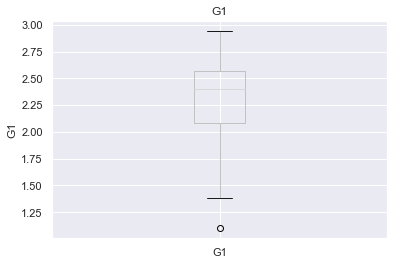

In [129]:
for features in continous_features:  # we use boxplot to find outliers in our data
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [130]:
categorical_features = [
    features for features in mainData.columns if mainData[features].dtype == 'O']
print(len(categorical_features))
mainData[categorical_features].head()

18


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,D
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,D
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,C
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,B
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,C


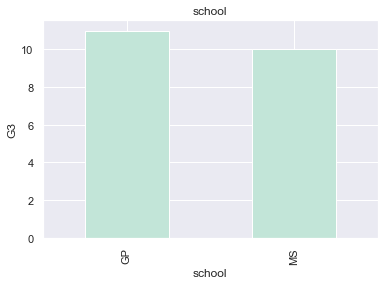

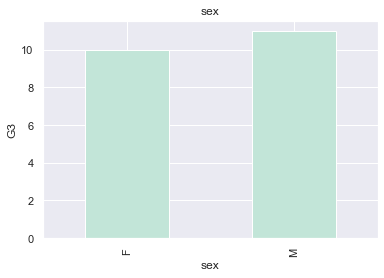

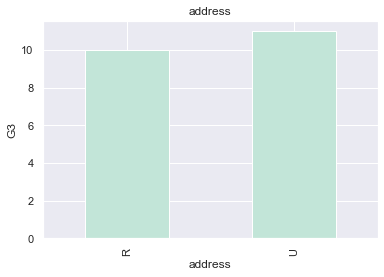

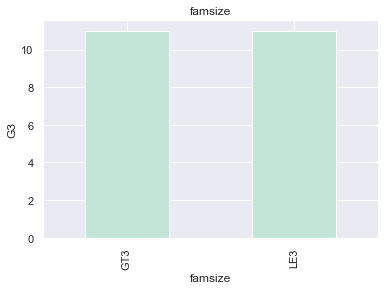

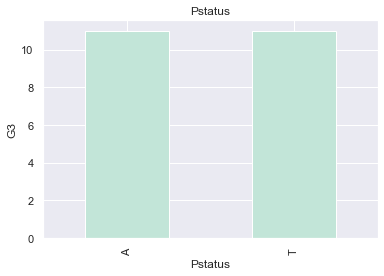

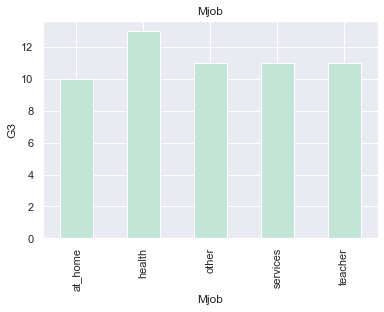

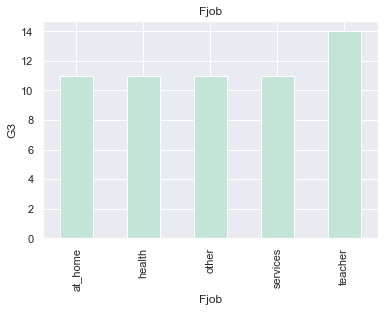

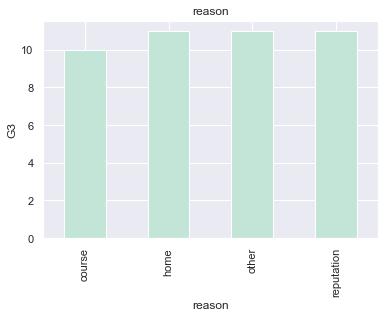

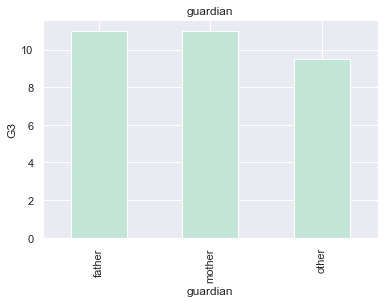

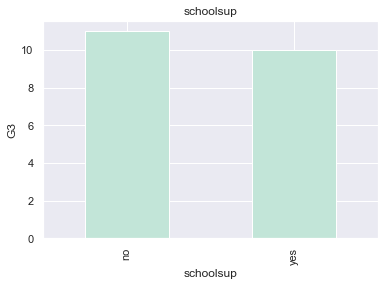

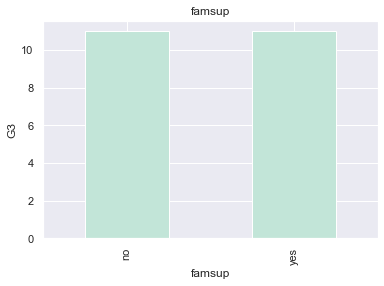

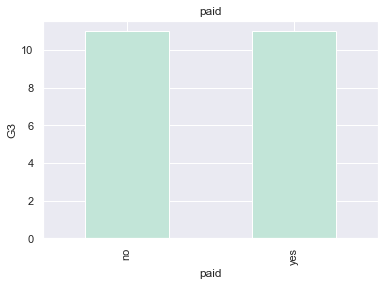

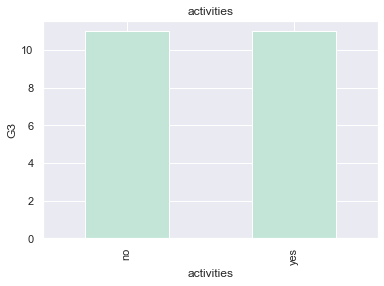

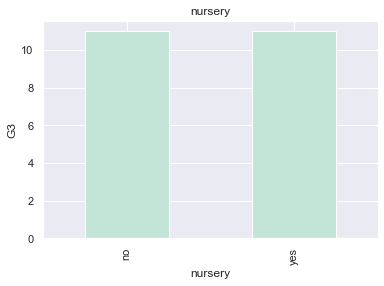

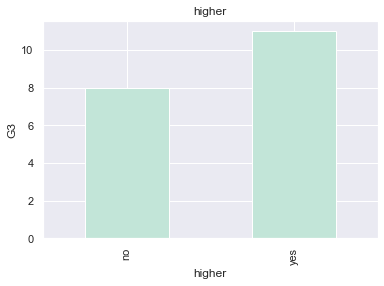

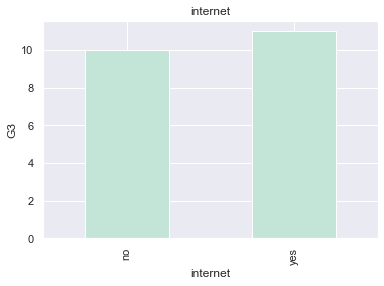

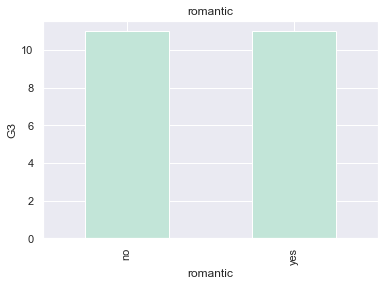

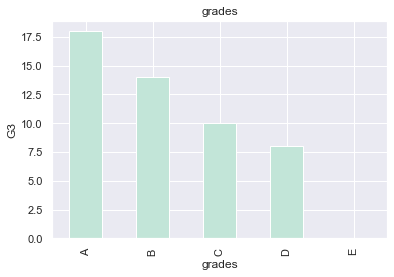

In [131]:
# finding the relationship between categorical variables and dependent variables

for features in categorical_features:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

In [132]:
for feature in categorical_features:
    labels_ordered = mainData.groupby(
        [feature])['G3'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    mainData[feature] = mainData[feature].map(labels_ordered)

mainData[categorical_features].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,1,0,1,0,1,0,4,0,1,0,1,0,0,1,1,0,1,1
1,1,0,1,0,0,0,1,0,2,1,0,0,0,0,1,1,1,1
2,1,0,1,1,0,0,1,3,1,0,1,1,0,1,1,1,1,2
3,1,0,1,0,0,4,2,1,1,1,0,1,1,1,1,1,0,3
4,1,0,1,0,0,1,1,1,2,1,0,1,0,1,1,0,1,2


In [133]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

feature_scale = [
    features for features in mainData.columns if features not in ['G3']]
print(feature_scale)
scalar.fit_transform(mainData[feature_scale])


mainData = pd.concat([mainData[['G3']].reset_index(drop=True), pd.DataFrame(
    scalar.fit_transform(mainData[feature_scale]), columns=feature_scale)], axis=1)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'grades']


In [134]:
print("Data type : ", type(mainData))
print("Data dims : ", mainData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (395, 34)


In [135]:
print(mainData.dtypes)

G3              int64
school        float64
sex           float64
age           float64
address       float64
famsize       float64
Pstatus       float64
Medu          float64
Fedu          float64
Mjob          float64
Fjob          float64
reason        float64
guardian      float64
traveltime    float64
studytime     float64
failures      float64
schoolsup     float64
famsup        float64
paid          float64
activities    float64
nursery       float64
higher        float64
internet      float64
romantic      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
grades        float64
dtype: object


In [136]:
G3 = pd.DataFrame(mainData['G3'])
print("Data type : ", type(G3))
print("Data dims : ", G3.size)
G3.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  395


,G3
0,6
1,6
2,10
3,15
4,10


In [137]:
G3.describe()

,G3
count,395.000000
mean,10.415190
std,4.581443
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


<AxesSubplot:>

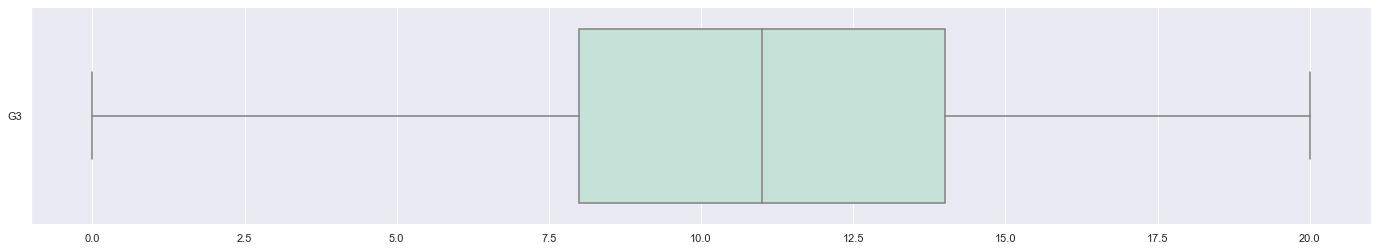

In [138]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = G3, orient = "h")

<AxesSubplot:ylabel='Count'>

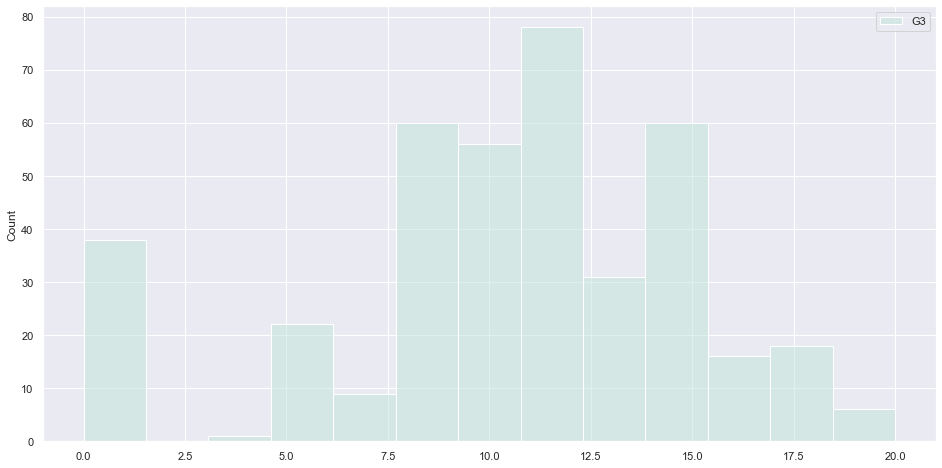

In [139]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = G3)

<AxesSubplot:ylabel='Density'>

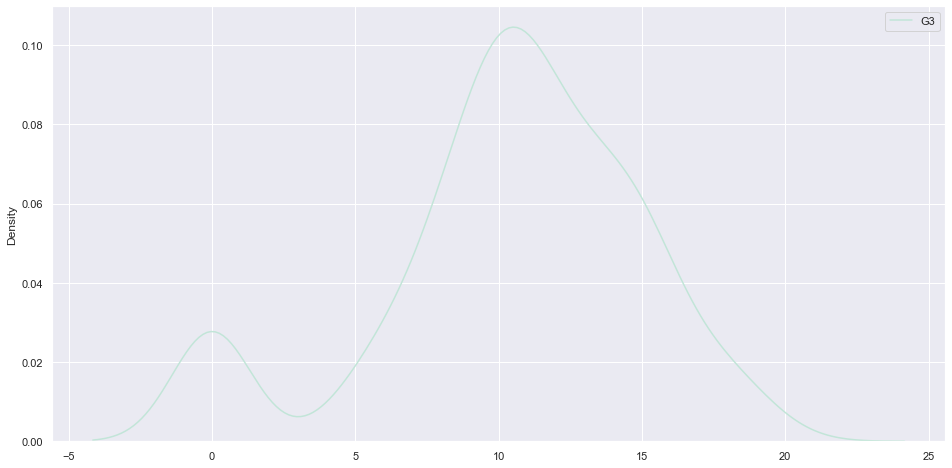

In [140]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = G3)

<AxesSubplot:ylabel='Count'>

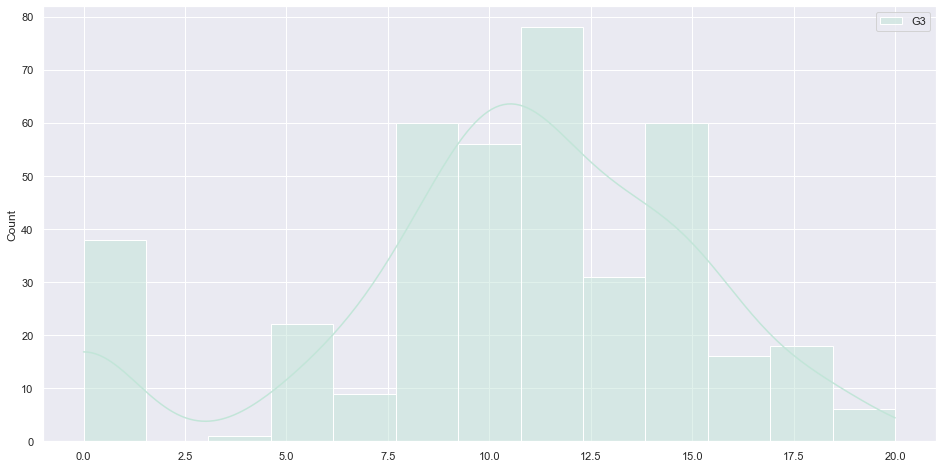

In [141]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = G3, kde = True)

<AxesSubplot:>

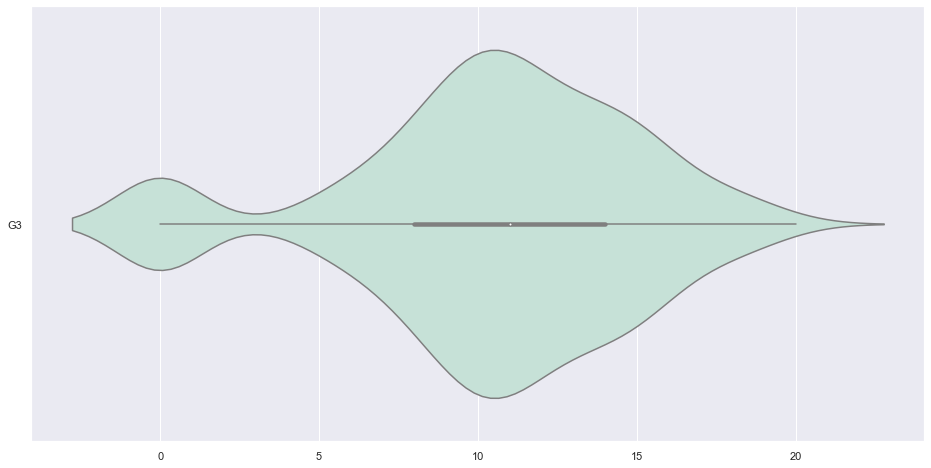

In [142]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = G3, orient = "h")

In [143]:
G3 = pd.DataFrame(mainData['G3'])
famrel = pd.DataFrame(mainData['famrel'])

In [144]:
famrel.describe()

,famrel
count,395.000000
mean,0.736076
std,0.224165
min,0.000000
25%,0.750000
50%,0.750000
75%,1.000000
max,1.000000


<AxesSubplot:>

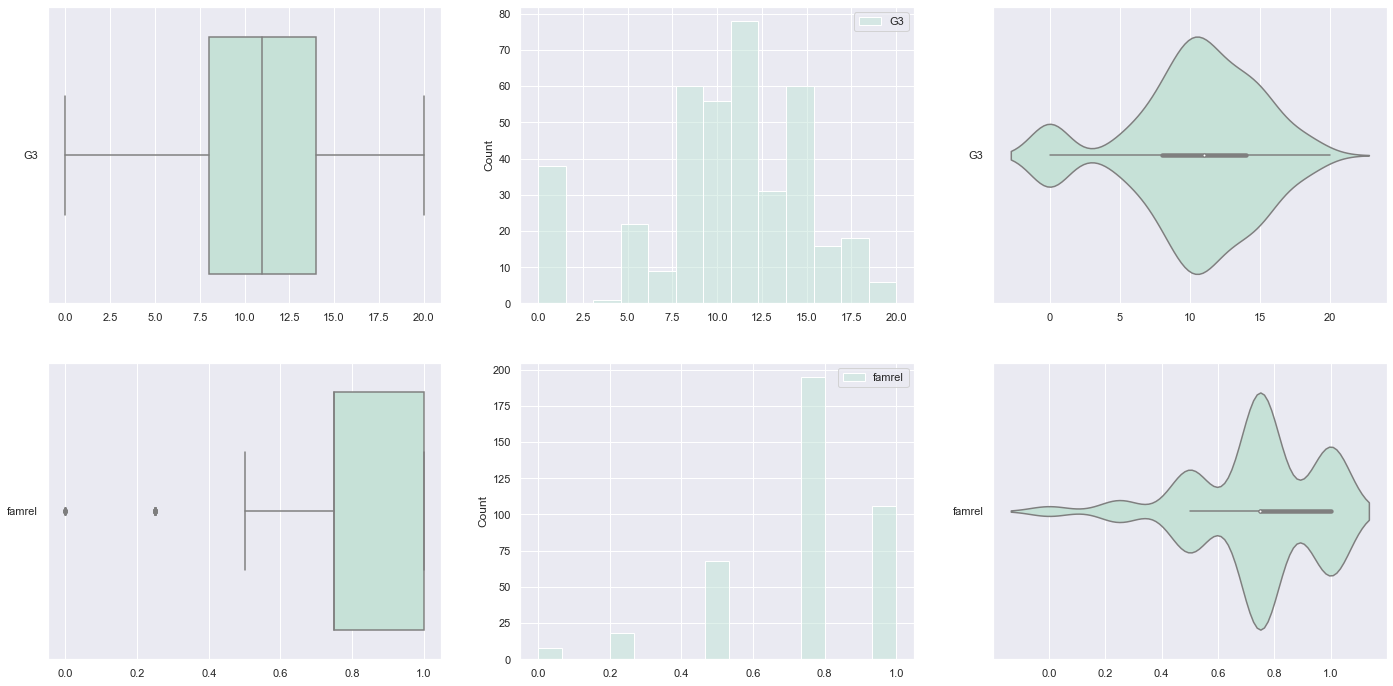

In [145]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = G3, orient = "h", ax = axes[0,0])
sb.histplot(data = G3, ax = axes[0,1])
sb.violinplot(data = G3, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = famrel, orient = "h", ax = axes[1,0])
sb.histplot(data = famrel, ax = axes[1,1])
sb.violinplot(data = famrel, orient = "h", ax = axes[1,2])

In [146]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([famrel, G3], axis = 1).reindex(famrel.index)
jointDF

,famrel,G3
0,0.75,6
1,1.00,6
2,0.75,10
3,0.50,15
4,0.75,10
...,...,...
390,1.00,9
391,0.25,16
392,1.00,7
393,0.75,10


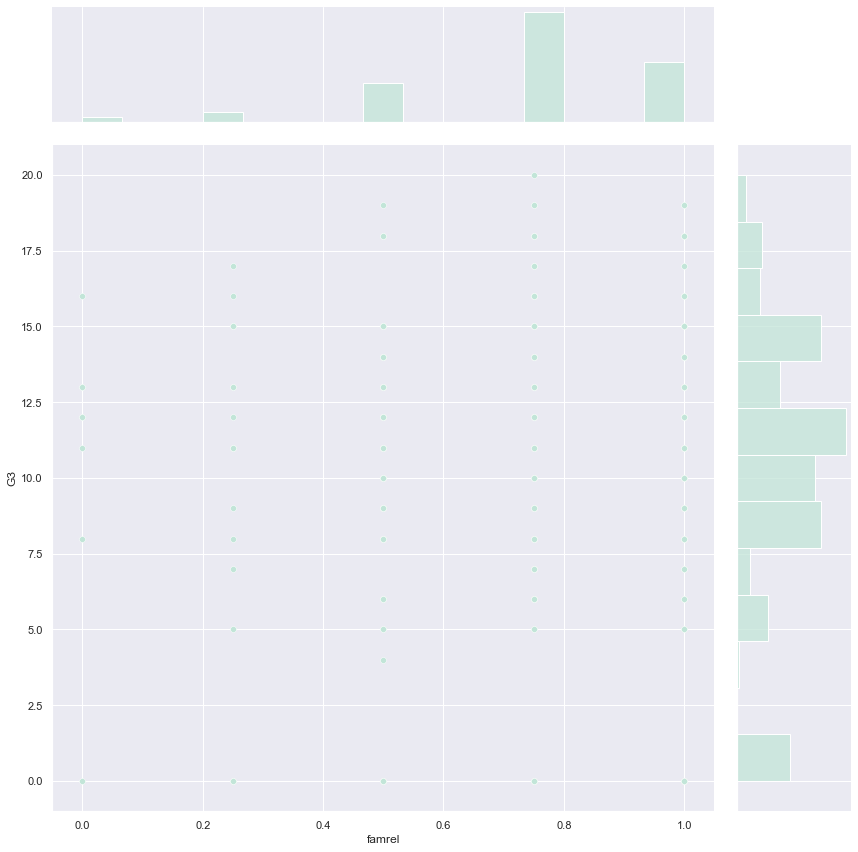

In [147]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "famrel", y = "G3", height = 12)

In [148]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,famrel,G3
famrel,1.000000,0.051363
G3,0.051363,1.000000


<AxesSubplot:>

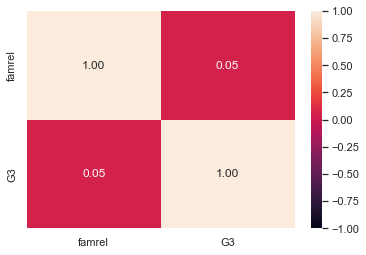

In [149]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [150]:
# Extract only the numeric data variables
numDF = pd.DataFrame(mainData[["G3", "famrel", "studytime", "health", "absences"]])

# Summary Statistics for all Variables
numDF.describe()

,G3,famrel,studytime,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.415190,0.736076,0.345148,0.638608,0.076118
std,4.581443,0.224165,0.279747,0.347576,0.106708
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.750000,0.000000,0.500000,0.000000
50%,11.000000,0.750000,0.333333,0.750000,0.053333
75%,14.000000,1.000000,0.333333,1.000000,0.106667
max,20.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

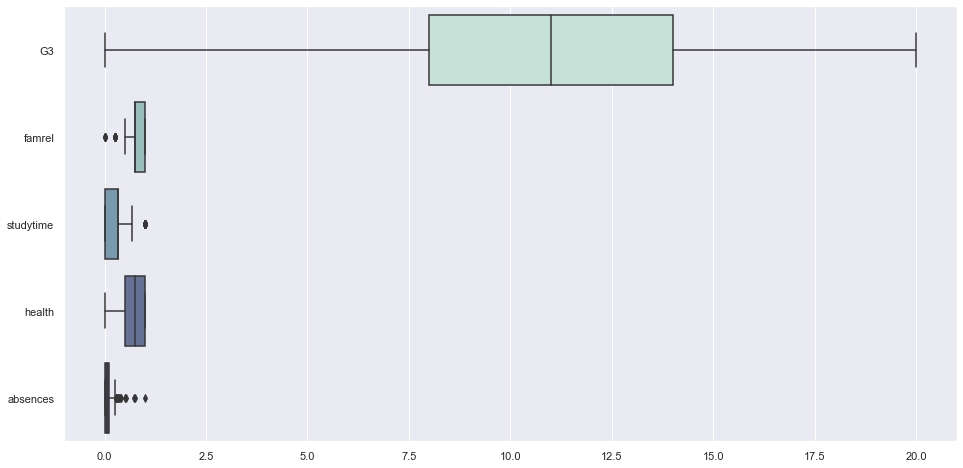

In [151]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numDF, orient = "h")

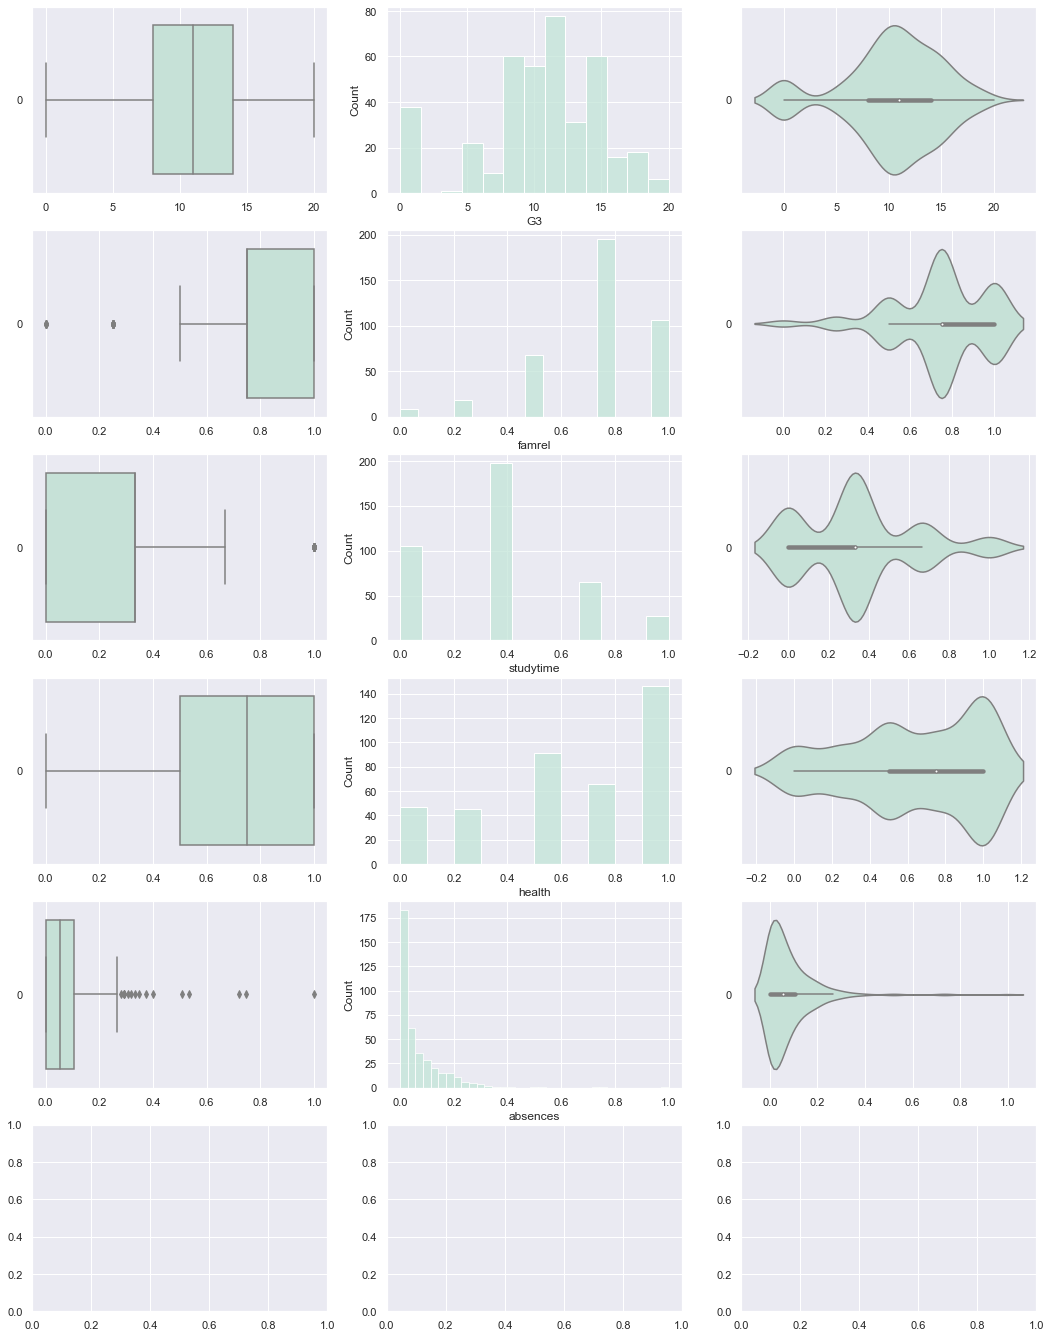

In [152]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [153]:
# Calculate the complete  correlation matrix
numDF.corr()

,G3,famrel,studytime,health,absences
G3,1.000000,0.051363,0.097820,-0.061335,0.034247
famrel,0.051363,1.000000,0.039731,0.094056,-0.044354
studytime,0.097820,0.039731,1.000000,-0.075616,-0.062700
health,-0.061335,0.094056,-0.075616,1.000000,-0.029937
absences,0.034247,-0.044354,-0.062700,-0.029937,1.000000


<AxesSubplot:>

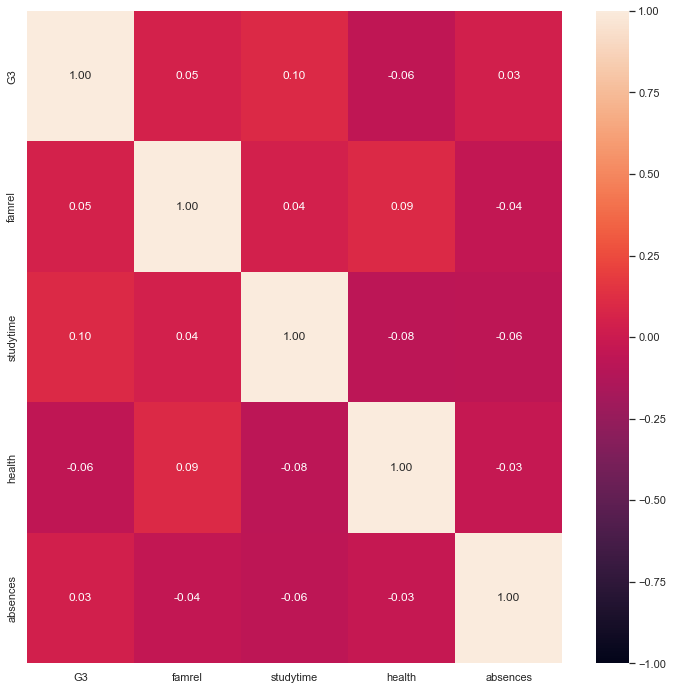

In [154]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

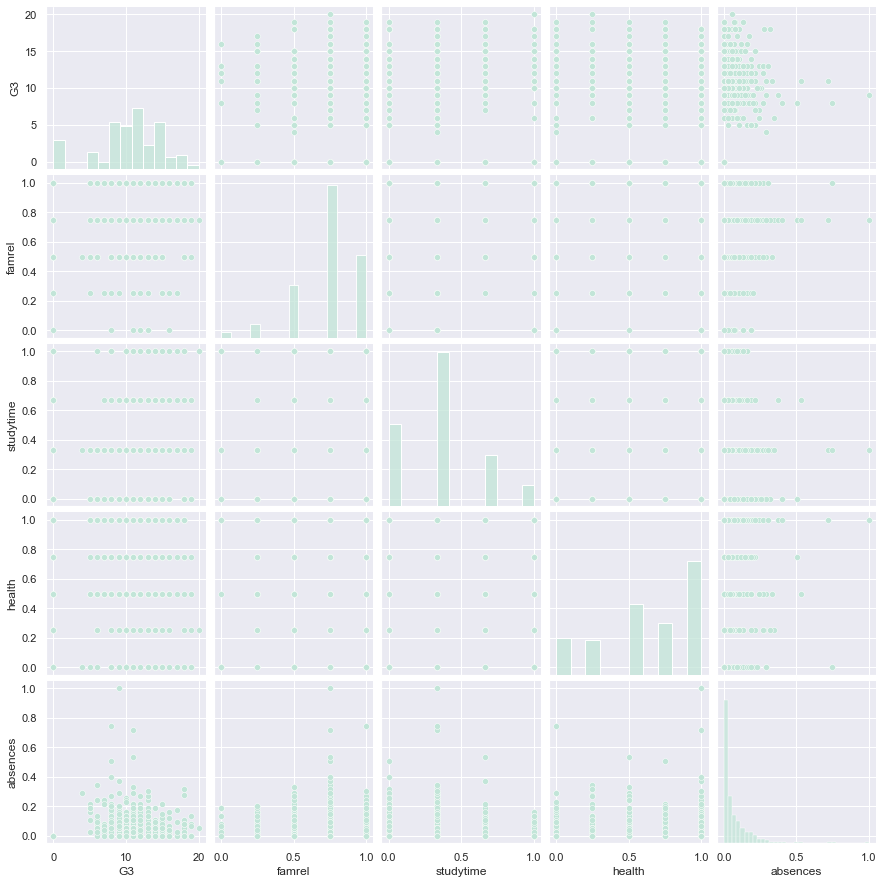

In [155]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

In [156]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [157]:
y = pd.DataFrame(mainData["G3"])  # Response
X = pd.DataFrame(mainData[["famrel", "studytime", "health", "absences"]])        # Predictor

In [158]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (296, 1) (296, 4)
Test Set  : (99, 1) (99, 4)


In [159]:
# Summary Statistics for Response
y_train.describe()

,G3
count,296.000000
mean,10.533784
std,4.449971
min,0.000000
25%,8.750000
50%,11.000000
75%,14.000000
max,20.000000


In [160]:
# Summary Statistics for Predictors
X_train.describe()

,famrel,studytime,health,absences
count,296.000000,296.000000,296.000000,296.000000
mean,0.729730,0.333333,0.657939,0.084054
std,0.229246,0.278549,0.344097,0.116591
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.500000,0.000000
50%,0.750000,0.333333,0.750000,0.053333
75%,1.000000,0.333333,1.000000,0.106667
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

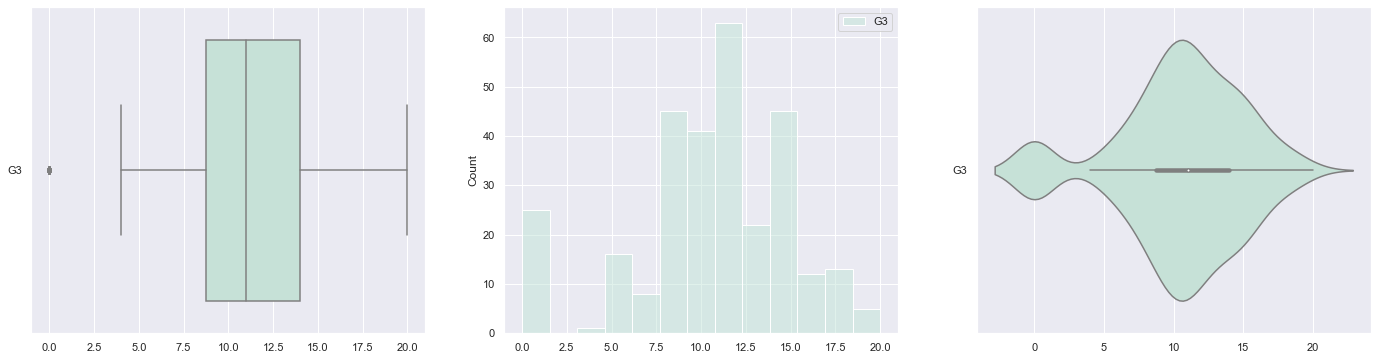

In [161]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

KeyError: 0

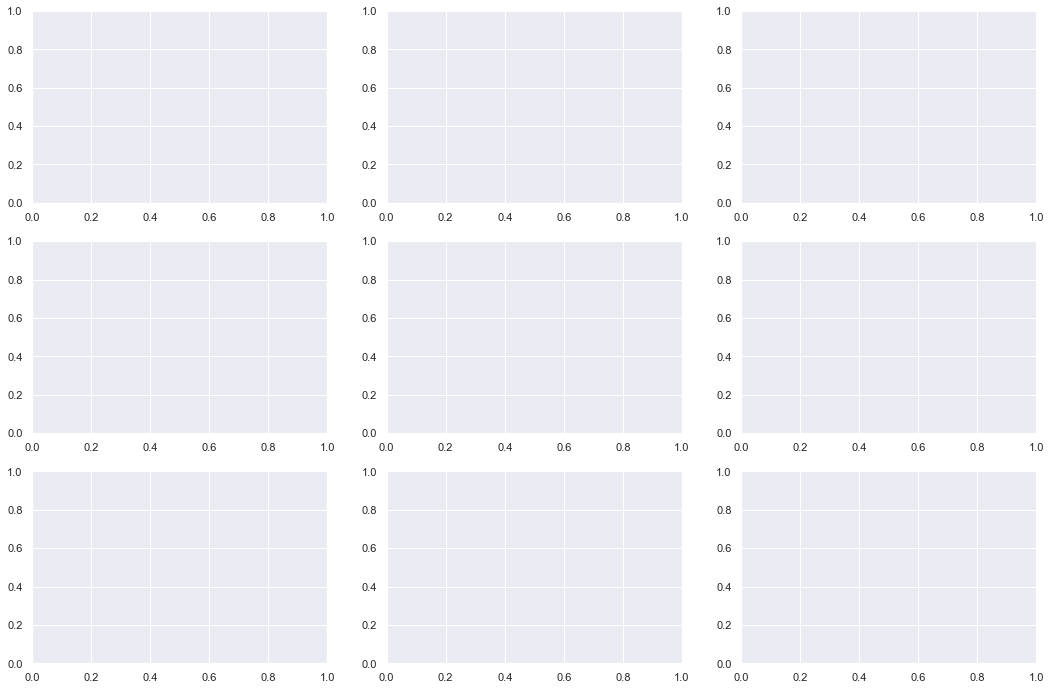

In [162]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

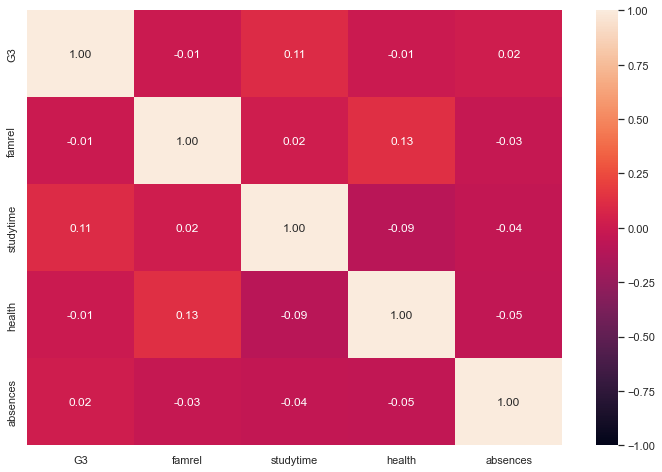

In [163]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

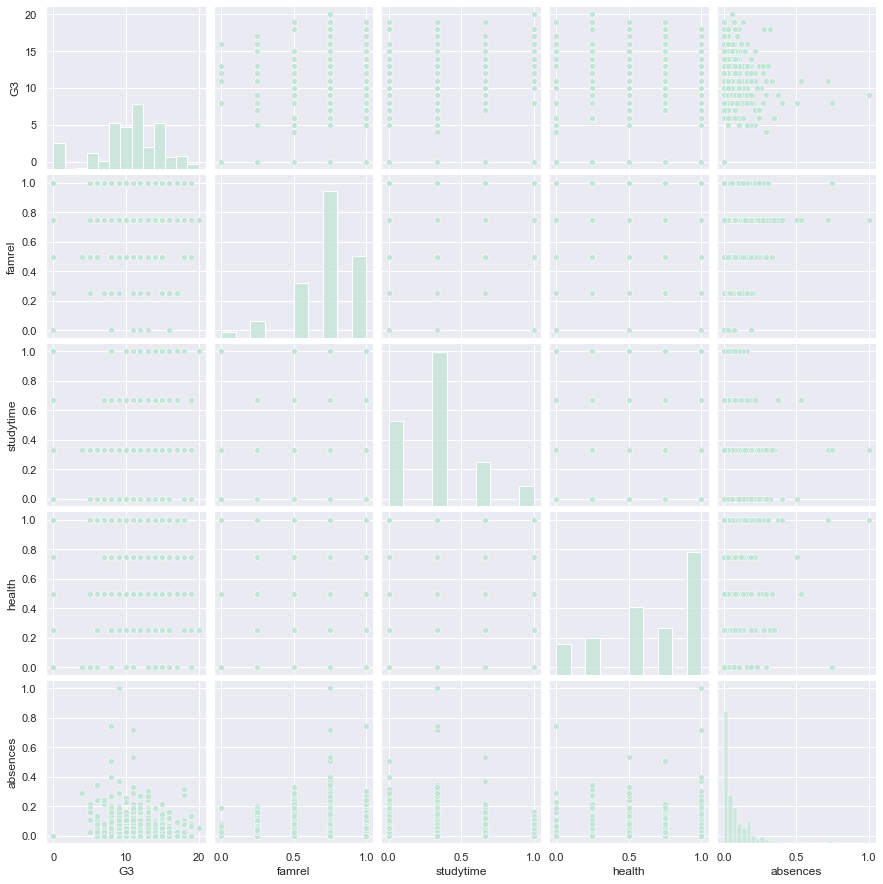

In [164]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

In [165]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [9.95576963]
Coefficients of Regression 	: a =  [[-0.15117828  1.71411762  0.05655776  0.94878624]]



,Predictors,Coefficients
0,famrel,-0.151178
1,studytime,1.714118
2,health,0.056558
3,absences,0.948786


In [170]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.02163769914403335
Mean Squared Error (MSE) 	: 22.444803215363706

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.031324749256324
Mean Squared Error (MSE) 	: 15.379481690879224



C:\Users\65974\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\65974\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\65974\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\65974\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\65974\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.0% of the points

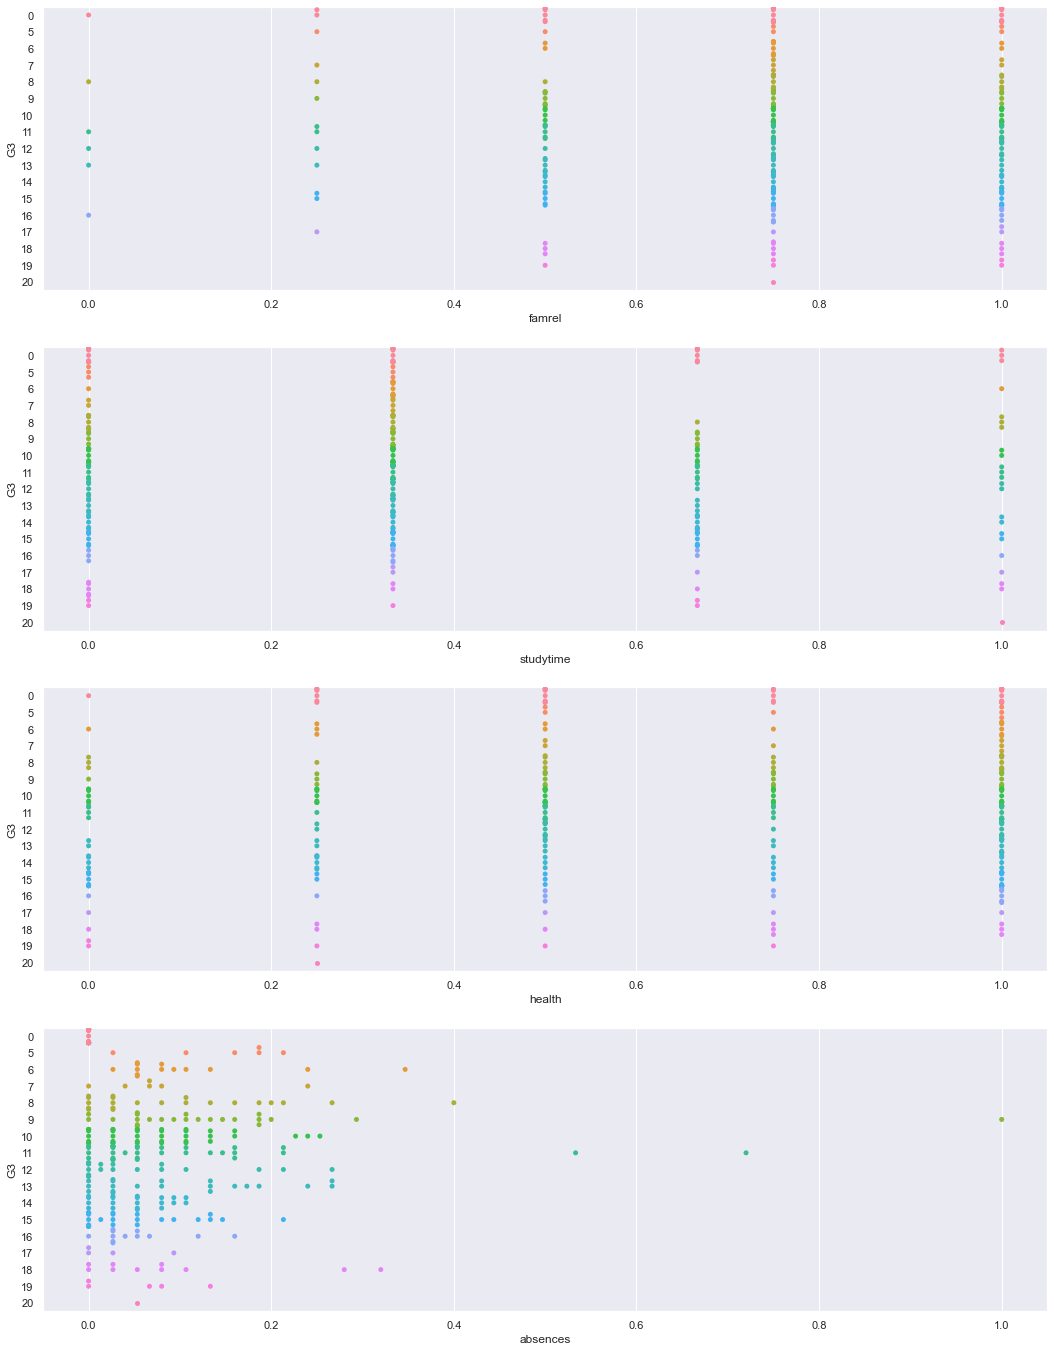

In [176]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(4, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "G3", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [180]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [191]:
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

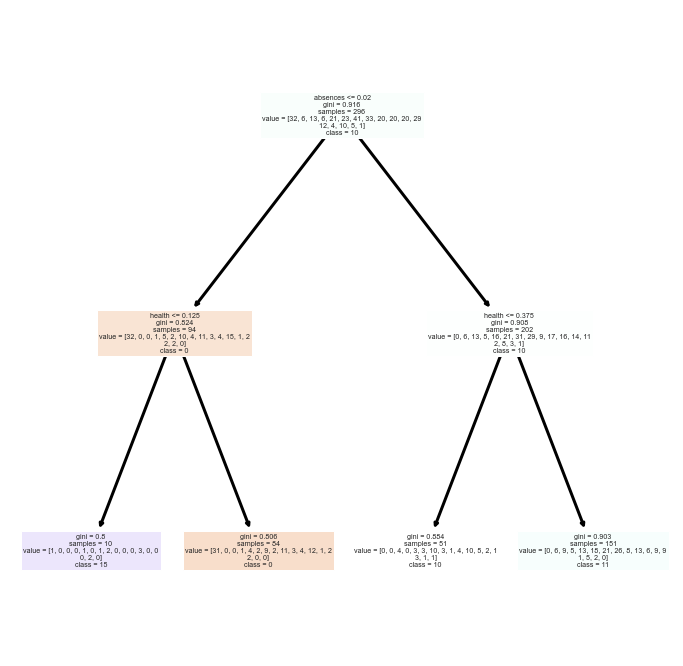

In [198]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()